In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from NetEmbs import *
# CONFIG.WORK_FOLDER = ("July5/RefactoringExperiments" + path_postfix_samplings, path_postfix_tf)

In [3]:
d_truth = upload_JournalEntriesTruth("Simulation/FSN_Data_v2.db")

## Upload data

In [2]:
DB_PATH = "Simulation/FSN_Data.db"
d = upload_data(DB_PATH, limit=None)
d = prepare_data(d)

Final shape of DataFrame is  (58559, 9)


In [7]:
def countNext(df):
    c=df.groupby("Next").count()
    return pd.Series(dict(zip(list(c.T), c.T.values[0])))

In [5]:
CONFIG.WINDOW_SIZE = 3
# CONFIG.PRESSURE = 10
# CONFIG.WALKS_PER_NODE = 10
# CONFIG.WALKS_LENGTH = 10
CONFIG.HACK = 0.5
print(f"Current config parameters: \n WALKS_PER_NODE={CONFIG.WALKS_PER_NODE}, \n walk_length={CONFIG.WALKS_LENGTH}")
print(f"PRESSURE={CONFIG.PRESSURE} \n WINDOW_SIZE={CONFIG.WINDOW_SIZE}")
cur_pairs = get_SkipGrams(d, walks_per_node=CONFIG.WALKS_PER_NODE, \
                          walk_length=CONFIG.WALKS_LENGTH, use_cache=False)
print(len(cur_pairs))

Current config parameters: 
 WALKS_PER_NODE=20, 
 walk_length=8
PRESSURE=30 
 WINDOW_SIZE=3
Start sampling... wait...
--------- Started the SAMPLING the sequences from FSN ---------



Additionally sample the nearest neighbours...



Elapsed time for sampling:  3.7446630001068115
Cashing sampled sequences...


AttributeError: module 'NetEmbs.CONFIG' has no attribute 'WORK_FOLDER'

In [9]:
map_truth = dict(zip(d_truth.ID.values, d_truth.GroundTruth.values))
cur_truth = pd.DataFrame(data=[[map_truth[pair[0]], map_truth[pair[1]]] for pair in cur_pairs], columns=["Current", "Next"])
final_df = cur_truth.groupby("Current").apply(countNext).reset_index()\
        .pivot(index='Current', columns='level_1', values=0).fillna(0)
del final_df.index.name
del final_df.columns.name
final_df

,Collections,Depreciation,Disbursement,Fixed Assets,Good delivery,Payroll,Payroll Disbursement,Purchase,Sales 21 btw,Sales 6 btw,Sales tax
Collections,46844.0,0.0,6527.0,2356.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Depreciation,0.0,14204.0,0.0,4.0,23.0,11.0,0.0,1.0,9.0,10.0,0.0
Disbursement,6527.0,0.0,9156.0,8481.0,2.0,0.0,0.0,0.0,1.0,4.0,0.0
Fixed Assets,2356.0,4.0,8481.0,9414.0,14.0,1.0,0.0,0.0,8.0,26.0,0.0
Good delivery,0.0,23.0,2.0,14.0,82022.0,87.0,0.0,1.0,10.0,57.0,0.0
Payroll,0.0,11.0,0.0,1.0,87.0,38872.0,0.0,1.0,1703.0,339.0,0.0
Payroll Disbursement,0.0,0.0,0.0,0.0,0.0,0.0,6014.0,0.0,0.0,0.0,11092.0
Purchase,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1390.0,0.0,5.0,0.0
Sales 21 btw,0.0,9.0,1.0,8.0,10.0,1703.0,0.0,0.0,27102.0,10791.0,0.0
Sales 6 btw,0.0,10.0,4.0,26.0,57.0,339.0,0.0,5.0,10791.0,31504.0,0.0


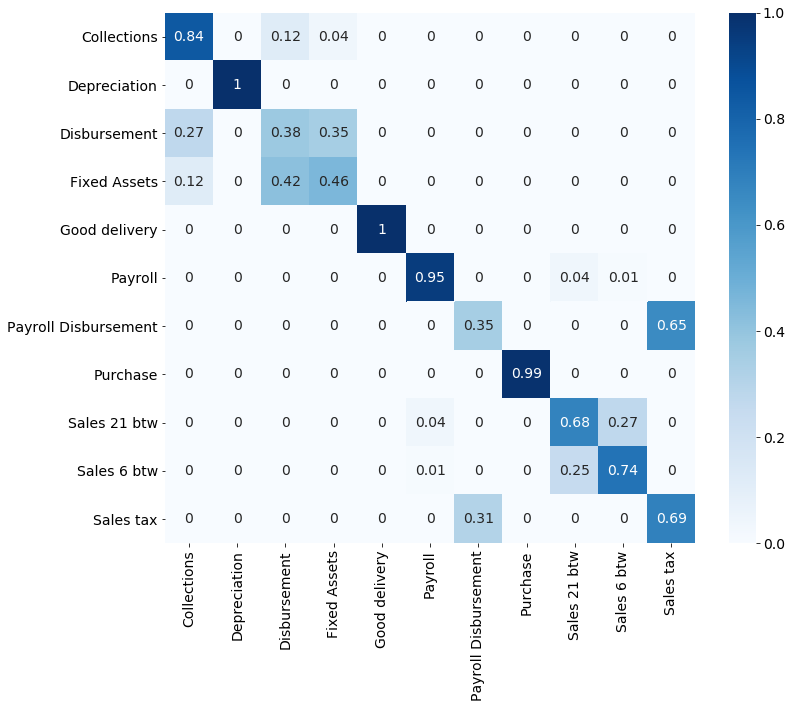

In [10]:
import seaborn as sns
set_font(14)
plt.figure(figsize=(12, 10))
sns.heatmap(final_df.apply(lambda x: round(x/x.sum(), 2), axis=1), cmap="Blues", annot=True, square=True) 
# plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("img/SensitivityAnalysis/Middle_finWalk_winSize"+str(CONFIG.WINDOW_SIZE)\
            +"_walks"+str(CONFIG.WALKS_PER_NODE)\
            +"_length"+str(CONFIG.WALKS_LENGTH) \
            +"_pressure"+str(CONFIG.PRESSURE)\
            +"_hack"+str(CONFIG.HACK)+".jpg", dpi=140, pad_inches=0.01)

## Visualisation settings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from NetEmbs import *

MODE = "SimulatedData"
DB_PATH = "Simulation/FSN_Data.db"


if MODE == "SimulatedData":
    EMBS_PATH = "July5/Data2Vis_versionMetaDiff_directionCOMBI_walks20_pressure30_window2_1hopFraction0.4/TFsteps100000batch64_emb32/"
#     EMBS_PATH = "Simulation_versionMetaDiff_directionCOMBI_walks30_pressure30_window3/TFsteps100000batch64_emb32/"
    embs = pd.read_pickle(EMBS_PATH+"cache/Embeddings.pkl")
    print("Embeddings have been uploaded to memory!")
    d = upload_data(DB_PATH, limit=None)
    d = prepare_data(d)
    print("Supported information has been uploaded to memory!")

Embeddings have been uploaded to memory!
Final shape of DataFrame is  (58559, 9)
Supported information has been uploaded to memory!


In [2]:
N_CLS = 8
embs = dim_reduction(cl_Agglomerative(embs, N_CLS))

First row of Data: 
 [-0.16064171  0.13438642 -0.04356103  0.12186836  0.14403826 -0.13202798
  0.1789747  -0.16715619  0.0652208   0.19040498 -0.1197283   0.25624064
  0.17608349 -0.15397078  0.1567329   0.22998302 -0.30777571  0.03810183
  0.03599864  0.17220093  0.22173657  0.15520439 -0.21307051  0.24494869
  0.23712434 -0.09002039  0.21147229 -0.12785374  0.22915092 -0.23721875
 -0.21997549 -0.01448612]


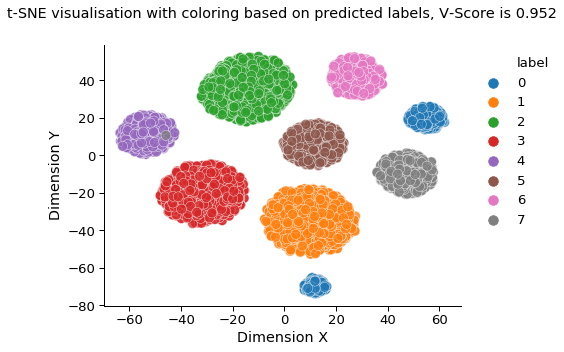

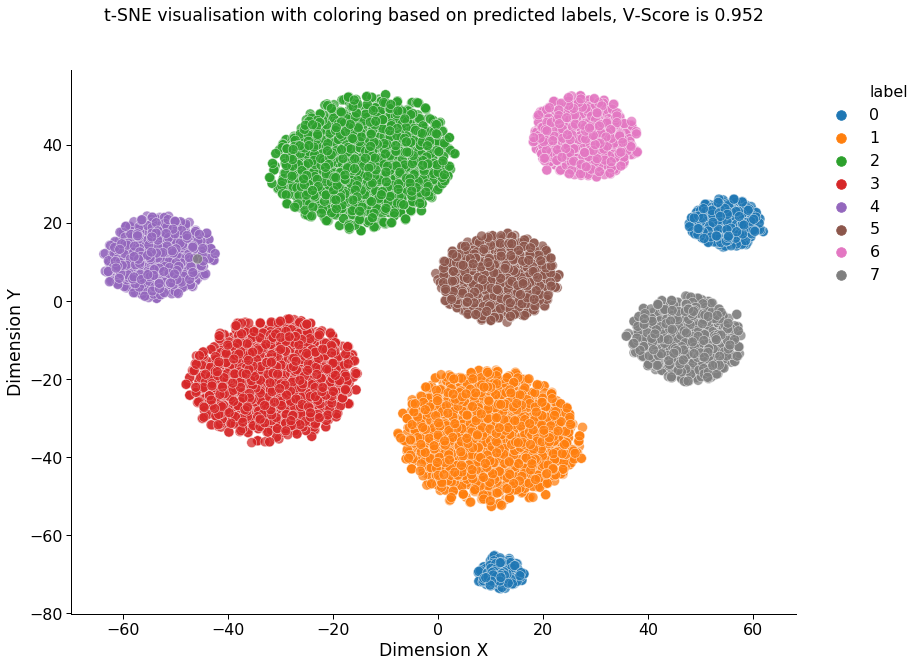

In [3]:
plot_tSNE(embs, "label", context="paper_half")
plot_tSNE(embs, "label", context="paper_full")

# Tests, July 7-8

In [1]:
from NetEmbs import *
from NetEmbs import CONFIG
from NetEmbs.utils import *
import logging
import pandas as pd
import pickle

# TODO Marcel, replace here ROOT_FOLDER to folder, where you would like to store all tmps and final Results
CONFIG.ROOT_FOLDER = "UvA/SensitivityAnalysis/"
DB_PATH = "Simulation/FSN_Data.db"
RESULT_FILE = "Results.xlsx"
LIMIT = 1000
N_CL = 11

create_folder(CONFIG.ROOT_FOLDER)

CONFIG.PRESSURE = 10
CONFIG.STEPS = 15000
# 0. Loggers adding
log_me(name=CONFIG.MAIN_LOGGER, folder=CONFIG.ROOT_FOLDER, file_name="GlobalLogs")
logging.getLogger(CONFIG.MAIN_LOGGER).info("Started..")
# 0.1 Add DataFrame to store the obtain results
try:
    # Open file with already existing results
    res = pd.read_excel(CONFIG.ROOT_FOLDER + RESULT_FILE, index_col=0)
except FileNotFoundError as e:
    # If could not find that file, create new empty one
    res = pd.DataFrame(
        columns=['ExperimentNum', 'Strategy', 'Pressure', 'WalkPerNode', 'WalkLength', 'WindowSize', 'EMBD size',
                 'Train steps', 'Batch size', 'Adjusted Rand index', 'Adjusted Mutual Information', 'V-measure',
                 'Fowlkes-Mallows index', 'Sampling time', 'TF time'])
    res.to_excel(CONFIG.ROOT_FOLDER + RESULT_FILE)
print("Welcome to refactoring experiments!")
if CONFIG.MODE == "SimulatedData":
    # 1. Upload JournaEntries into memory
    d = upload_data(DB_PATH, limit=LIMIT, logger_name=CONFIG.MAIN_LOGGER)
    journal_truth = upload_JournalEntriesTruth(DB_PATH)[["ID", "GroundTruth", "Time"]]
    # 2. Data pre-processing
    d = prepare_data(d, logger_name=CONFIG.MAIN_LOGGER)

if CONFIG.MODE == "RealData":
    # //////// TODO UPLOAD your data HERE \\\\\\\\\\
    # d = bData()
    # //////// END  \\\\\\\\\\
    d = rename_columns(d, names={"transactionID": "ID", "accountID": "FA_Name", "BR": "GroundTruth",
                                 "amount": "Value"})
    # TODO pay attention for the split argument below!
    if "Value" in list(d):
        need_split = True
    else:
        need_split = False
    d = prepare_dataMarcel(d, split=need_split, logger_name=CONFIG.MAIN_LOGGER)
    journal_truth = d.groupby("ID", as_index=False).agg({"GroundTruth": "first"})
# let's check it
countDirtyData(d, ["Debit", "Credit"])
# 3. Create Financial Statement Network object
CONFIG.GLOBAL_FSN = FSN()
CONFIG.GLOBAL_FSN.build(d, left_title="FA_Name")
print("FSN sucessfully constructed: \n", CONFIG.GLOBAL_FSN.info())
logging.getLogger(CONFIG.MAIN_LOGGER).info(f"FSN successfully constructed: \n, {str(CONFIG.GLOBAL_FSN.info())}")
for sampling_exp in [1, 2]:
    for tf_exp in [1, 2]:
        print(f'-------------- Experiment {(sampling_exp, tf_exp)} --------------')
        logging.getLogger(CONFIG.MAIN_LOGGER).info(f'-------------- Experiment {(sampling_exp, tf_exp)} --------------')
        CONFIG.EXPERIMENT = (sampling_exp, tf_exp)
        # 4. Update CONFIG file w.r.t. the new arguments if applicable
        try:
            updateCONFIG()
        except TypeError as e:
            logging.getLogger(CONFIG.MAIN_LOGGER).critical(e)
            raise TypeError("Critical error during CONFIG update. Stop execution!")
        except IOError as e:
            logging.getLogger(CONFIG.MAIN_LOGGER).critical(e)
            raise IOError("Critical error during CONFIG update. Stop execution!")
        cur_params = {"ExperimentNum": CONFIG.EXPERIMENT, "Strategy": CONFIG.STEP_VERSION,
                      "Pressure": CONFIG.PRESSURE,
                      "WalkPerNode": CONFIG.WALKS_PER_NODE,
                      "WalkLength": CONFIG.WALKS_LENGTH, "WindowSize": CONFIG.WINDOW_SIZE,
                      "EMBD size": CONFIG.EMBD_SIZE,
                      "Train steps": CONFIG.STEPS, "Batch size": CONFIG.BATCH_SIZE}
        # TODO update CONFIG values and create tmps folders
        print("Loading Embeddings from cache... wait...")
        try:
            with open(CONFIG.WORK_FOLDER[0] + CONFIG.WORK_FOLDER[1] + "cache/Embeddings.pkl", "rb") as file:
                embeddings = pickle.load(file)
                run_times = {"Sampling time": 0.0, "TF time": 0.0}
        except FileNotFoundError:
            print("File not found... Recalculate \n")
            print("Sampling sequences... wait...")
            # 5.  ///////// Getting embeddings \\\\\\\\\\\\
            try:
                embeddings, run_times = get_embs_TF(evaluate_time=True)
            except Exception as e:
                logging.getLogger(CONFIG.MAIN_LOGGER).error("We've got an error in get_embs_TF function... ",
                                                            exc_info=True)

            # 6. //////// Merge with GroundTruth \\\\\\\\\
            embeddings = embeddings.merge(journal_truth, on="ID")

            # 7. Dimensionality reduction for visualisation purposes
            embeddings = dim_reduction(embeddings)
            embeddings.to_pickle(CONFIG.WORK_FOLDER[0] + CONFIG.WORK_FOLDER[1] + "cache/Embeddings.pkl")

        #  8.  ////////// Clustering in embedding space \\\\\\\
        cl_labs = cl_Agglomerative(embeddings, N_CL)
        # 8.1 Plot t-SNE visualisation
        plot_tSNE(cl_labs, "label", folder=CONFIG.WORK_FOLDER[0] + CONFIG.WORK_FOLDER[1], title="Predicted label",
                  context="paper_full")
        plot_tSNE(cl_labs, "GroundTruth", folder=CONFIG.WORK_FOLDER[0] + CONFIG.WORK_FOLDER[1],
                  title="Ground Truth",
                  context="paper_full")
        print("Plotted required graphs!")
        # 8.2 ////////// Evaluate clustering quality \\\\\\\
        all_metrics = evaluate_all(cl_labs)
        # 9. Construct one row with given parameters and obtained results
        cur_params.update(all_metrics)
        cur_params.update(run_times)
        # Upload previous Results file
        res = pd.read_excel(CONFIG.ROOT_FOLDER + RESULT_FILE, index_col=0)
        # Append new result to DataFrame and save as Excel file
        res = res.append(cur_params, ignore_index=True)
        res.to_excel(CONFIG.ROOT_FOLDER + RESULT_FILE)


I0708 17:31:49.793191 4543260096 <ipython-input-1-aca18c3485e9>:21] Started..
I0708 17:31:49.998487 4543260096 connect_db.py:43] Connection to DataBase
I0708 17:31:50.008238 4543260096 connect_db.py:52] Data has been uploaded
I0708 17:31:50.075237 4543260096 prepare_data.py:29] Original shape of DataFrame is (1000, 4)
I0708 17:31:50.079234 4543260096 prepare_data.py:34] Deleted all NaNs and Strings values from 'Value' column: (1000, 4)
I0708 17:31:50.084626 4543260096 prepare_data.py:39] Split Values column into Credit and Debit ones: ['ID', 'Name', 'FA_Name', 'Value', 'Debit', 'Credit']
I0708 17:31:50.091275 4543260096 prepare_data.py:45] After merging FAs columns titles are: ['ID', 'FA_Name', 'Credit', 'Debit', 'Name', 'Value'] shape is (998, 6)
I0708 17:31:50.124048 4543260096 prepare_data.py:56] After normalization shape of DataFrame is (977, 8)


Welcome to refactoring experiments!


I0708 17:31:50.542093 4543260096 prepare_data.py:61] Final shape of DataFrame is (954, 9)
I0708 17:31:50.664101 4543260096 <ipython-input-1-aca18c3485e9>:60] FSN successfully constructed: 
, {'left_title': 'FA_Name', 'right_title': 'ID', 'BPs': 173, 'FAs': 419, 'Total size': 789330}
I0708 17:31:50.665507 4543260096 <ipython-input-1-aca18c3485e9>:64] -------------- Experiment (1, 1) --------------
I0708 17:31:50.666349 4543260096 update_config.py:30] Config file has been updated!
I0708 17:31:50.666915 4543260096 update_config.py:31] Working folder is 
 ('UvA/SensitivityAnalysis/verMetaDiff_dirCOMBI_walks20_pressure10_window2_1hopFraction0_1/', 'EMB32_batch64_TFsteps15000_ 1/')
I0708 17:31:50.668889 4543260096 update_config.py:34] Started..
I0708 17:31:50.670149 4543260096 utils.py:725] Current SAMPLING parameters: 
 WindowSize:  2 
 Pressure:  10
 Strategy:  MetaDiff


Final shape of DataFrame is  (954, 9)
Strings in numeric columns:  {'Debit': 0, 'Credit': 0}
NaN in numeric columns:  {'Debit': 0, 'Credit': 0}
Zeros BPs:  {'Credit': 0, 'Debit': 0}
FSN sucessfully constructed: 
 {'left_title': 'FA_Name', 'right_title': 'ID', 'BPs': 173, 'FAs': 419, 'Total size': 789330}
-------------- Experiment (1, 1) --------------
Config file has been updated!
Working directory is  UvA/SensitivityAnalysis/verMetaDiff_dirCOMBI_walks20_pressure10_window2_1hopFraction0_1/EMB32_batch64_TFsteps15000_ 1/
Loading Embeddings from cache... wait...
File not found... Recalculate 

Sampling sequences... wait...
Found FSN object in memory!
Current SAMPLING parameters: 
 WindowSize:  2 
 Pressure:  10
 Strategy:  MetaDiff
Loading SkipGrams from cache... wait...
File not found... Recalculate 

Start sampling... wait...
Loading sequences from cache... wait...
File not found... Recalculate 

Sampling sequences... wait...


I0708 17:31:50.876392 4543260096 utils.py:498] Created a Pool with 8 processes 
I0708 17:31:50.880002 4543260096 utils.py:499] Total size of broadcasting arguments is 6292 bytes 
I0708 17:31:50.893605 4543260096 utils.py:500] Total size of FSN is 789330 bytes 


I0708 17:31:52.455219 4543260096 utils.py:545] Total number of raw sampled sequences is 3460
I0708 17:31:52.460026 4543260096 utils.py:546] Average length of sequences is 8.0


Elapsed time for sampling:  1.790018081665039
Cashing sampled sequences...
--------- Ended the SAMPLING the sequences from FSN ---------
--------- Started making pairs from the sequences ---------
--------- Ended making pairs from the sequences ---------


I0708 17:31:53.650295 4543260096 utils.py:647] Total number of raw sampled pairs is 85506
I0708 17:31:53.780061 4543260096 tensor_flow.py:74] Initialize TF model
I0708 17:31:53.781585 4543260096 tensor_flow.py:89] Current TensorFlow parameters: 
 Embedding size:  32 
 Steps:  15000
 Batch size:  64
W0708 17:31:53.784487 4543260096 deprecation_wrapper.py:119] From /Users/lex/Dev/GitHub/NetEmbs/NetEmbs/SkipGram/tensor_flow.py:94: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0708 17:31:53.806190 4543260096 deprecation_wrapper.py:119] From /Users/lex/Dev/GitHub/NetEmbs/NetEmbs/SkipGram/tensor_flow.py:109: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0708 17:31:53.813774 4543260096 deprecation_wrapper.py:119] From /Users/lex/Dev/GitHub/NetEmbs/NetEmbs/SkipGram/tensor_flow.py:122: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0708 17:31:53.832244 4543260096 de

[(2, 100), (2, 50), (100, 2), (100, 50), (100, 164)]
Current TensorFlow parameters: 
 Embedding size:  32 
 Steps:  15000
 Batch size:  64


W0708 17:31:54.273175 4543260096 deprecation_wrapper.py:119] From /Users/lex/Dev/GitHub/NetEmbs/NetEmbs/SkipGram/tensor_flow.py:172: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W0708 17:31:54.276150 4543260096 deprecation_wrapper.py:119] From /Users/lex/Dev/GitHub/NetEmbs/NetEmbs/SkipGram/tensor_flow.py:173: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.

W0708 17:31:54.365125 4543260096 deprecation_wrapper.py:119] From /Users/lex/Dev/GitHub/NetEmbs/NetEmbs/SkipGram/tensor_flow.py:175: The name tf.global_variables_initializer is deprecated. Please use tf.compat.v1.global_variables_initializer instead.

I0708 17:31:54.573944 4543260096 tensor_flow.py:198] Average train loss at step 0: 3.990480899810791


Initialized tf-model for the following parameters: 
Average train loss at step  0 :  3.990480899810791


I0708 17:31:58.984210 4543260096 tensor_flow.py:198] Average train loss at step 5000: 1.1496295800089835


Average train loss at step  5000 :  1.1496295800089835


I0708 17:32:03.473556 4543260096 tensor_flow.py:198] Average train loss at step 10000: 0.8063613896965981


Average train loss at step  10000 :  0.8063613896965981


I0708 17:32:08.490262 4543260096 tensor_flow.py:198] Average train loss at step 15000: 0.7936227054178715
I0708 17:32:08.507005 4543260096 tensor_flow.py:271] Use the following command to see the Tensorboard with all collected stats during last running: 
tensorboard --logdir=model/UvA/SensitivityAnalysis/verMetaDiff_dirCOMBI_walks20_pressure10_window2_1hopFraction0_1/EMB32_batch64_TFsteps15000_ 1/
I0708 17:32:08.513779 4543260096 dimensionality_reduction.py:19] Dimensionality reduction for visualisation purposes


Average train loss at step  15000 :  0.7936227054178715
Elapsed time:  14.13748288154602
Done with TensorFlow!
Use the following command to see the Tensorboard with all collected stats during last running: 

tensorboard --logdir=model/UvA/SensitivityAnalysis/verMetaDiff_dirCOMBI_walks20_pressure10_window2_1hopFraction0_1/EMB32_batch64_TFsteps15000_ 1/


I0708 17:32:08.978038 4543260096 agglomerative.py:33] Agglomerative clustering - DONE


First row of Data: 
 [-0.15614609  0.18816151  0.17748752  0.16037183  0.16120479 -0.26987103
  0.13917893  0.24805087 -0.03707887 -0.18284403  0.03064017  0.29644608
 -0.18536639  0.01823086 -0.10602922 -0.17858583 -0.18457572 -0.10616032
  0.15441728 -0.19570017  0.23285751  0.09667505  0.16064709  0.05714906
  0.10750712 -0.08176694  0.21664807  0.20601748 -0.08542144 -0.10782355
  0.37290147 -0.18998988]


I0708 17:32:10.896447 4543260096 <ipython-input-1-aca18c3485e9>:64] -------------- Experiment (1, 2) --------------
I0708 17:32:10.897870 4543260096 update_config.py:30] Config file has been updated!
I0708 17:32:10.898828 4543260096 update_config.py:31] Working folder is 
 ('UvA/SensitivityAnalysis/verMetaDiff_dirCOMBI_walks20_pressure10_window2_1hopFraction0_1/', 'EMB32_batch64_TFsteps15000_ 2/')
I0708 17:32:10.900816 4543260096 update_config.py:34] Started..
I0708 17:32:10.901849 4543260096 utils.py:725] Current SAMPLING parameters: 
 WindowSize:  2 
 Pressure:  10
 Strategy:  MetaDiff
I0708 17:32:10.912775 4543260096 tensor_flow.py:74] Initialize TF model
I0708 17:32:10.913912 4543260096 tensor_flow.py:89] Current TensorFlow parameters: 
 Embedding size:  32 
 Steps:  15000
 Batch size:  64


Plotted required graphs!
-------------- Experiment (1, 2) --------------
Config file has been updated!
Working directory is  UvA/SensitivityAnalysis/verMetaDiff_dirCOMBI_walks20_pressure10_window2_1hopFraction0_1/EMB32_batch64_TFsteps15000_ 2/
Loading Embeddings from cache... wait...
File not found... Recalculate 

Sampling sequences... wait...
Found FSN object in memory!
Current SAMPLING parameters: 
 WindowSize:  2 
 Pressure:  10
 Strategy:  MetaDiff
Loading SkipGrams from cache... wait...
[(2, 100), (2, 50), (100, 2), (100, 50), (100, 164)]
Current TensorFlow parameters: 
 Embedding size:  32 
 Steps:  15000
 Batch size:  64


I0708 17:32:11.516788 4543260096 tensor_flow.py:198] Average train loss at step 0: 4.431950569152832


Initialized tf-model for the following parameters: 
Average train loss at step  0 :  4.431950569152832


I0708 17:32:14.752446 4543260096 tensor_flow.py:198] Average train loss at step 5000: 1.149618324649334


Average train loss at step  5000 :  1.149618324649334


I0708 17:32:19.243653 4543260096 tensor_flow.py:198] Average train loss at step 10000: 0.8052410003364087


Average train loss at step  10000 :  0.8052410003364087


I0708 17:32:23.176241 4543260096 tensor_flow.py:198] Average train loss at step 15000: 0.7954194314599037
I0708 17:32:23.191127 4543260096 tensor_flow.py:271] Use the following command to see the Tensorboard with all collected stats during last running: 
tensorboard --logdir=model/UvA/SensitivityAnalysis/verMetaDiff_dirCOMBI_walks20_pressure10_window2_1hopFraction0_1/EMB32_batch64_TFsteps15000_ 2/
I0708 17:32:23.198286 4543260096 dimensionality_reduction.py:19] Dimensionality reduction for visualisation purposes


Average train loss at step  15000 :  0.7954194314599037
Elapsed time:  11.780320644378662
Done with TensorFlow!
Use the following command to see the Tensorboard with all collected stats during last running: 

tensorboard --logdir=model/UvA/SensitivityAnalysis/verMetaDiff_dirCOMBI_walks20_pressure10_window2_1hopFraction0_1/EMB32_batch64_TFsteps15000_ 2/


I0708 17:32:23.784596 4543260096 agglomerative.py:33] Agglomerative clustering - DONE


First row of Data: 
 [ 0.30140388  0.21602552 -0.25269696  0.13241929 -0.16915585 -0.10645667
 -0.14546463  0.02970776  0.20256041  0.13548635 -0.22307587 -0.04926676
 -0.15563299 -0.28625885  0.16120321 -0.0729728  -0.21387267  0.0060017
 -0.21630794  0.06223733  0.10246333 -0.31046546 -0.10865971 -0.10607917
 -0.17679654 -0.0567126  -0.14926165 -0.19171649 -0.20407309  0.19588456
 -0.10130528 -0.24470372]


I0708 17:32:25.770672 4543260096 <ipython-input-1-aca18c3485e9>:64] -------------- Experiment (2, 1) --------------
I0708 17:32:25.771821 4543260096 update_config.py:30] Config file has been updated!
I0708 17:32:25.772574 4543260096 update_config.py:31] Working folder is 
 ('UvA/SensitivityAnalysis/verMetaDiff_dirCOMBI_walks20_pressure10_window2_1hopFraction0_2/', 'EMB32_batch64_TFsteps15000_ 1/')
I0708 17:32:25.774533 4543260096 update_config.py:34] Started..
I0708 17:32:25.775653 4543260096 utils.py:725] Current SAMPLING parameters: 
 WindowSize:  2 
 Pressure:  10
 Strategy:  MetaDiff


Plotted required graphs!
-------------- Experiment (2, 1) --------------
Config file has been updated!
Working directory is  UvA/SensitivityAnalysis/verMetaDiff_dirCOMBI_walks20_pressure10_window2_1hopFraction0_2/EMB32_batch64_TFsteps15000_ 1/
Loading Embeddings from cache... wait...
File not found... Recalculate 

Sampling sequences... wait...
Found FSN object in memory!
Current SAMPLING parameters: 
 WindowSize:  2 
 Pressure:  10
 Strategy:  MetaDiff
Loading SkipGrams from cache... wait...
File not found... Recalculate 

Start sampling... wait...
Loading sequences from cache... wait...
File not found... Recalculate 

Sampling sequences... wait...


I0708 17:32:25.913798 4543260096 utils.py:498] Created a Pool with 8 processes 
I0708 17:32:25.919578 4543260096 utils.py:499] Total size of broadcasting arguments is 6292 bytes 
I0708 17:32:25.935189 4543260096 utils.py:500] Total size of FSN is 789330 bytes 


I0708 17:32:27.551938 4543260096 utils.py:545] Total number of raw sampled sequences is 3460
I0708 17:32:27.556923 4543260096 utils.py:546] Average length of sequences is 8.0


Elapsed time for sampling:  1.7815890312194824
Cashing sampled sequences...
--------- Ended the SAMPLING the sequences from FSN ---------
--------- Started making pairs from the sequences ---------
--------- Ended making pairs from the sequences ---------


I0708 17:32:28.681843 4543260096 utils.py:647] Total number of raw sampled pairs is 85744
I0708 17:32:28.816726 4543260096 tensor_flow.py:74] Initialize TF model
I0708 17:32:28.817818 4543260096 tensor_flow.py:89] Current TensorFlow parameters: 
 Embedding size:  32 
 Steps:  15000
 Batch size:  64


[(4, 88), (4, 156), (88, 4), (88, 156), (88, 141)]
Current TensorFlow parameters: 
 Embedding size:  32 
 Steps:  15000
 Batch size:  64


I0708 17:32:29.379123 4543260096 tensor_flow.py:198] Average train loss at step 0: 4.378379821777344


Initialized tf-model for the following parameters: 
Average train loss at step  0 :  4.378379821777344


I0708 17:32:33.166045 4543260096 tensor_flow.py:198] Average train loss at step 5000: 1.1454466539502144


Average train loss at step  5000 :  1.1454466539502144


I0708 17:32:36.807084 4543260096 tensor_flow.py:198] Average train loss at step 10000: 0.8072720477581025


Average train loss at step  10000 :  0.8072720477581025


I0708 17:32:39.904171 4543260096 tensor_flow.py:198] Average train loss at step 15000: 0.7966375036239624
I0708 17:32:39.920871 4543260096 tensor_flow.py:271] Use the following command to see the Tensorboard with all collected stats during last running: 
tensorboard --logdir=model/UvA/SensitivityAnalysis/verMetaDiff_dirCOMBI_walks20_pressure10_window2_1hopFraction0_2/EMB32_batch64_TFsteps15000_ 1/
I0708 17:32:39.928986 4543260096 dimensionality_reduction.py:19] Dimensionality reduction for visualisation purposes


Average train loss at step  15000 :  0.7966375036239624
Elapsed time:  10.674681901931763
Done with TensorFlow!
Use the following command to see the Tensorboard with all collected stats during last running: 

tensorboard --logdir=model/UvA/SensitivityAnalysis/verMetaDiff_dirCOMBI_walks20_pressure10_window2_1hopFraction0_2/EMB32_batch64_TFsteps15000_ 1/


I0708 17:32:40.490416 4543260096 agglomerative.py:33] Agglomerative clustering - DONE


First row of Data: 
 [-0.07935238 -0.02328584 -0.20972148  0.09640581  0.2204439   0.05670999
  0.09536267 -0.1134832   0.17106156  0.32793424  0.03543708 -0.14097768
 -0.25208518 -0.21153557 -0.10565872  0.1750291  -0.17301913 -0.2232247
 -0.22456005 -0.12728235 -0.29712901  0.00034828 -0.27693412 -0.16756628
 -0.10159665  0.06663188 -0.24524678  0.10664821 -0.21136111 -0.0434112
 -0.18054497 -0.23062436]


I0708 17:32:42.482836 4543260096 <ipython-input-1-aca18c3485e9>:64] -------------- Experiment (2, 2) --------------
I0708 17:32:42.483568 4543260096 update_config.py:30] Config file has been updated!
I0708 17:32:42.484101 4543260096 update_config.py:31] Working folder is 
 ('UvA/SensitivityAnalysis/verMetaDiff_dirCOMBI_walks20_pressure10_window2_1hopFraction0_2/', 'EMB32_batch64_TFsteps15000_ 2/')
I0708 17:32:42.486505 4543260096 update_config.py:34] Started..
I0708 17:32:42.488449 4543260096 utils.py:725] Current SAMPLING parameters: 
 WindowSize:  2 
 Pressure:  10
 Strategy:  MetaDiff
I0708 17:32:42.502745 4543260096 tensor_flow.py:74] Initialize TF model
I0708 17:32:42.503536 4543260096 tensor_flow.py:89] Current TensorFlow parameters: 
 Embedding size:  32 
 Steps:  15000
 Batch size:  64


Plotted required graphs!
-------------- Experiment (2, 2) --------------
Config file has been updated!
Working directory is  UvA/SensitivityAnalysis/verMetaDiff_dirCOMBI_walks20_pressure10_window2_1hopFraction0_2/EMB32_batch64_TFsteps15000_ 2/
Loading Embeddings from cache... wait...
File not found... Recalculate 

Sampling sequences... wait...
Found FSN object in memory!
Current SAMPLING parameters: 
 WindowSize:  2 
 Pressure:  10
 Strategy:  MetaDiff
Loading SkipGrams from cache... wait...
[(4, 88), (4, 156), (88, 4), (88, 156), (88, 141)]
Current TensorFlow parameters: 
 Embedding size:  32 
 Steps:  15000
 Batch size:  64


I0708 17:32:43.140891 4543260096 tensor_flow.py:198] Average train loss at step 0: 4.333233833312988


Initialized tf-model for the following parameters: 
Average train loss at step  0 :  4.333233833312988


I0708 17:32:46.663513 4543260096 tensor_flow.py:198] Average train loss at step 5000: 1.1493809589624404


Average train loss at step  5000 :  1.1493809589624404


I0708 17:32:51.258555 4543260096 tensor_flow.py:198] Average train loss at step 10000: 0.806509792625904


Average train loss at step  10000 :  0.806509792625904


I0708 17:32:55.516716 4543260096 tensor_flow.py:198] Average train loss at step 15000: 0.7946950319468975
I0708 17:32:55.532998 4543260096 tensor_flow.py:271] Use the following command to see the Tensorboard with all collected stats during last running: 
tensorboard --logdir=model/UvA/SensitivityAnalysis/verMetaDiff_dirCOMBI_walks20_pressure10_window2_1hopFraction0_2/EMB32_batch64_TFsteps15000_ 2/
I0708 17:32:55.540848 4543260096 dimensionality_reduction.py:19] Dimensionality reduction for visualisation purposes


Average train loss at step  15000 :  0.7946950319468975
Elapsed time:  12.49907922744751
Done with TensorFlow!
Use the following command to see the Tensorboard with all collected stats during last running: 

tensorboard --logdir=model/UvA/SensitivityAnalysis/verMetaDiff_dirCOMBI_walks20_pressure10_window2_1hopFraction0_2/EMB32_batch64_TFsteps15000_ 2/


I0708 17:32:56.157727 4543260096 agglomerative.py:33] Agglomerative clustering - DONE


First row of Data: 
 [ 0.17075406 -0.2032866   0.00652441 -0.22927512 -0.04230457  0.16559663
 -0.14054066 -0.27256152 -0.12518954  0.21812627  0.20253852 -0.12337982
  0.13220319 -0.18383127  0.24370794 -0.11482871 -0.05386129  0.24758542
 -0.1190755  -0.10629518  0.1994471   0.2030433  -0.15203722 -0.23520613
 -0.073783   -0.14317049 -0.14749031 -0.25737745  0.25402823 -0.14124264
  0.22190711 -0.11630482]
Plotted required graphs!


In [8]:
import pandas as pd
# res = pd.DataFrame(columns=['ExperimentNum', 'Strategy', 'Pressure', 'WalkPerNode', 'WalkLength', 'WindowSize', 'EMBD size', 'Train steps', 'Batch size', 'Adjusted Rand index', 'Adjusted Mutual Information', 'V-measure', 'Fowlkes-Mallows index', 'Sampling time', 'TF time'])
for _ in range(3):
    res = res.append(cur_params, ignore_index=True)
res

,ExperimentNum,Strategy,Pressure,WalkPerNode,WalkLength,WindowSize,EMBD size,Train steps,Batch size,Adjusted Rand index,Adjusted Mutual Information,V-measure,Fowlkes-Mallows index,Sampling time,TF time
0,,MetaDiff,10,20,8,2,32,15000,64,0.750137,0.81808,0.843579,0.779384,0.0,0.0
1,,MetaDiff,10,20,8,2,32,15000,64,0.750137,0.81808,0.843579,0.779384,0.0,0.0
2,,MetaDiff,10,20,8,2,32,15000,64,0.750137,0.81808,0.843579,0.779384,0.0,0.0
3,,MetaDiff,10,20,8,2,32,15000,64,0.750137,0.81808,0.843579,0.779384,0.0,0.0
4,,MetaDiff,10,20,8,2,32,15000,64,0.750137,0.81808,0.843579,0.779384,0.0,0.0
5,,MetaDiff,10,20,8,2,32,15000,64,0.750137,0.81808,0.843579,0.779384,0.0,0.0


In [16]:
res = pd.DataFrame(
            columns=['ExperimentNum', 'Strategy', 'Pressure', 'WalkPerNode', 'WalkLength', 'WindowSize', 'EMBD size',
                     'Train steps', 'Batch size', 'Adjusted Rand index', 'Adjusted Mutual Information', 'V-measure',
                     'Fowlkes-Mallows index', 'Sampling time', 'TF time'])
res.to_excel(CONFIG.ROOT_FOLDER+"Results.xlsx")

In [15]:
pd.read_excel(CONFIG.ROOT_FOLDER+"Results2.xlsx", index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: 'UvA/SensitivityAnalysis/Results2.xlsx'